# Similarity Scores



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re

In [ ]:
# Step 1: Load the CSV data
print("Loading data...")
df = pd.read_csv("/content/Experiment Summary - Sheet2.csv")
print(f"Loaded {len(df)} conversations")


Loading data...
Loaded 101 conversations


In [ ]:
print(df)

                                            user_input  \
0    I am having issues with my privacy, and people...   
1    I used to lose respect for people because they...   
2    For the past few weeks, I've been feeling real...   
3    Lately, I've been feeling down and struggling ...   
4    When I was younger, people teased me a lot and...   
..                                                 ...   
96   I've always been bullied and teased for being ...   
97   I talked to someone who said they will help me...   
98   I can do it, we can do it. In a way, my partne...   
99   I acted on my SAB the other day, and I think i...   
100  I've been having a lot of fear lately and it's...   

                                    therapist_response  \
0    I understand your concern regarding your priva...   
1    It seems that you've realized the importance o...   
2    Thank you for sharing your experiences with me...   
3    I appreciate you sharing your feelings and exp...   
4    It seems

In [ ]:
# Step 2: Clean text function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove strange characters and normalize whitespace
    text = re.sub(r'[^\w\s.,!?\'"-]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
# Step 3: Load the sentence transformer model
print("Loading sentence transformer model...")
model = SentenceTransformer('all-MiniLM-L6-v2')

Loading sentence transformer model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Step 4: Calculate similarities
print("Calculating similarities...")
# Get LLM column names (all columns after the therapist_response)
llm_columns = df.columns[2:].tolist()

# Create dataframe to store results
results = pd.DataFrame(index=df.index)

# Process each row
for idx, row in df.iterrows():
    # Get therapist response
    therapist_text = clean_text(row['therapist_response'])
    if not therapist_text:
        continue

    # Get therapist embedding
    therapist_embedding = model.encode(therapist_text)

    # Calculate similarity for each LLM response
    for col in llm_columns:
        llm_text = clean_text(row[col])
        if not llm_text:
            results.loc[idx, col] = np.nan
            continue

        # Get LLM embedding
        llm_embedding = model.encode(llm_text)

        # Calculate cosine similarity
        similarity = cosine_similarity(
            therapist_embedding.reshape(1, -1),
            llm_embedding.reshape(1, -1)
        )[0][0]

        # Store result
        results.loc[idx, col] = similarity

Calculating similarities...


Creating visualizations...


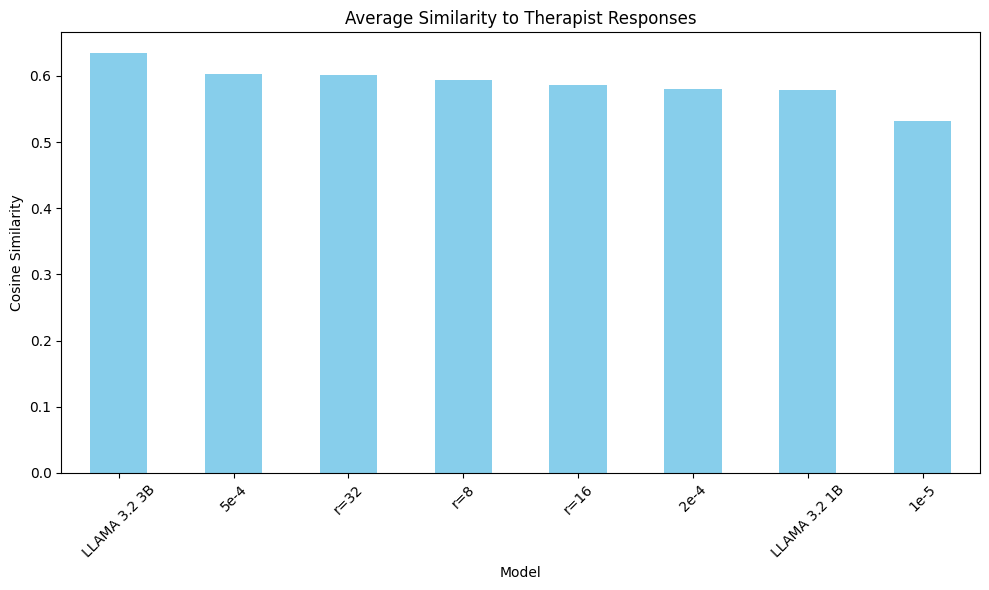

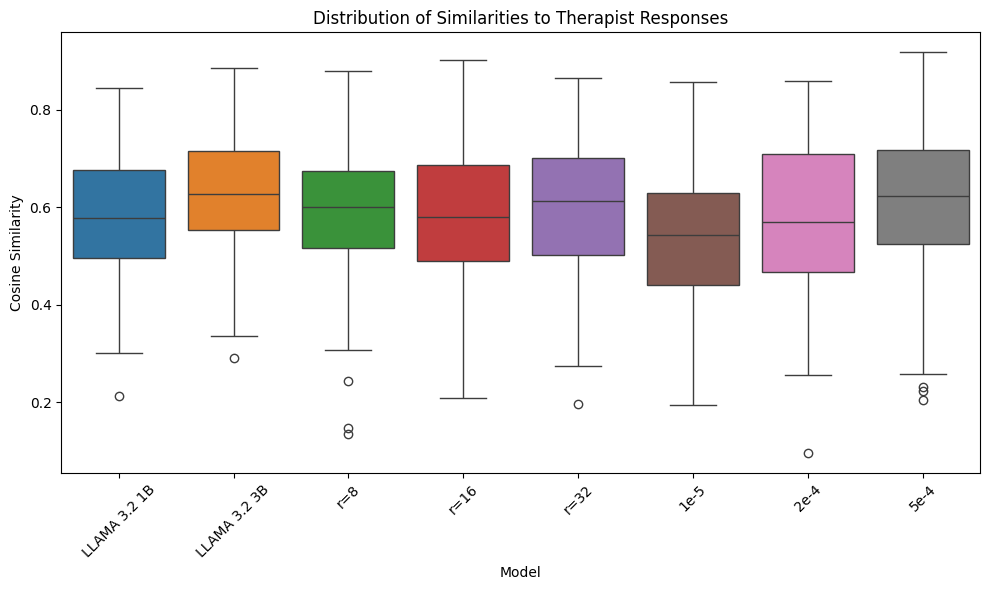

In [ ]:
# Step 5: Create visualizations
print("Creating visualizations...")

# 5.1: Average similarity bar chart
plt.figure(figsize=(10, 6))
avg_similarities = results.mean().sort_values(ascending=False)
avg_similarities.plot(kind='bar', color='skyblue')
plt.title('Average Similarity to Therapist Responses')
plt.ylabel('Cosine Similarity')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_similarities.png')

# 5.2: Similarity distributions (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title('Distribution of Similarities to Therapist Responses')
plt.ylabel('Cosine Similarity')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('similarity_distributions.png')


In [ ]:
# Step 6: Output results
print("\nAverage similarity scores:")
for model, score in avg_similarities.items():
    print(f"{model}: {score:.4f}")

# Save raw similarity scores to CSV
results.to_csv('similarity_scores.csv')
print("\nResults saved to 'similarity_scores.csv'")
print("Visualizations saved as 'avg_similarities.png' and 'similarity_distributions.png'")


Average similarity scores:
LLAMA 3.2 3B: 0.6343
5e-4: 0.6027
r=32: 0.6010
r=8: 0.5944
r=16: 0.5858
2e-4: 0.5804
LLAMA 3.2 1B: 0.5785
1e-5: 0.5320

Results saved to 'similarity_scores.csv'
Visualizations saved as 'avg_similarities.png' and 'similarity_distributions.png'


# Empathy Scores

In [ ]:
!pip install pandas numpy matplotlib seaborn sentence-transformers scikit-learn transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import re

In [ ]:
# Step 1: Load the CSV data
print("Loading data...")
df = pd.read_csv("/content/Experiment Summary - Sheet2.csv")
print(f"Loaded {len(df)} conversations")

# Step 2: Clean text function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove strange characters and normalize whitespace
    text = re.sub(r'[^\w\s.,!?\'"-]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


Loading data...
Loaded 101 conversations


In [ ]:
# Step 3: Load models
print("Loading models...")
# Model for semantic similarity
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')

# Model for empathy detection
# Using emotion-based model as a proxy for empathy detection
empathy_model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
empathy_tokenizer = AutoTokenizer.from_pretrained(empathy_model_name)
empathy_model = AutoModelForSequenceClassification.from_pretrained(empathy_model_name)

# Function to evaluate empathy
def evaluate_empathy(text):
    """Return empathy score based on emotional content"""
    if not text:
        return np.nan

    # Prepare inputs
    inputs = empathy_tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

    # Get prediction
    with torch.no_grad():
        outputs = empathy_model(**inputs)

    # Get scores (emotion probabilities)
    scores = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Emotions in this model: ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
    # For empathy, we focus on 'love' (index 3) which is closest to empathy/caring
    empathy_score = scores[0][3].item()

    return empathy_score

Loading models...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Step 4: Calculate similarities and empathy scores
print("Calculating similarities and empathy scores...")
# Get LLM column names (all columns after the therapist_response)
llm_columns = df.columns[2:].tolist()

# Create dataframes to store results
similarity_results = pd.DataFrame(index=df.index)
empathy_results = pd.DataFrame(index=df.index)

# First calculate empathy score for therapist responses
empathy_scores_therapist = []
for idx, row in df.iterrows():
    therapist_text = clean_text(row['therapist_response'])
    empathy_score = evaluate_empathy(therapist_text)
    empathy_scores_therapist.append(empathy_score)

# Add therapist empathy scores
empathy_results['therapist_response'] = empathy_scores_therapist

# Process each row for LLM responses
for idx, row in df.iterrows():
    # Get therapist response
    therapist_text = clean_text(row['therapist_response'])
    if not therapist_text:
        continue

    # Get therapist embedding
    therapist_embedding = similarity_model.encode(therapist_text)

    # Calculate similarity and empathy for each LLM response
    for col in llm_columns:
        llm_text = clean_text(row[col])
        if not llm_text:
            similarity_results.loc[idx, col] = np.nan
            empathy_results.loc[idx, col] = np.nan
            continue

        # Calculate similarity
        llm_embedding = similarity_model.encode(llm_text)
        similarity = cosine_similarity(
            therapist_embedding.reshape(1, -1),
            llm_embedding.reshape(1, -1)
        )[0][0]
        similarity_results.loc[idx, col] = similarity

        # Calculate empathy
        empathy_score = evaluate_empathy(llm_text)
        empathy_results.loc[idx, col] = empathy_score

Calculating similarities and empathy scores...


Creating visualizations...

Results saved to CSV files
Visualizations saved as PNG files


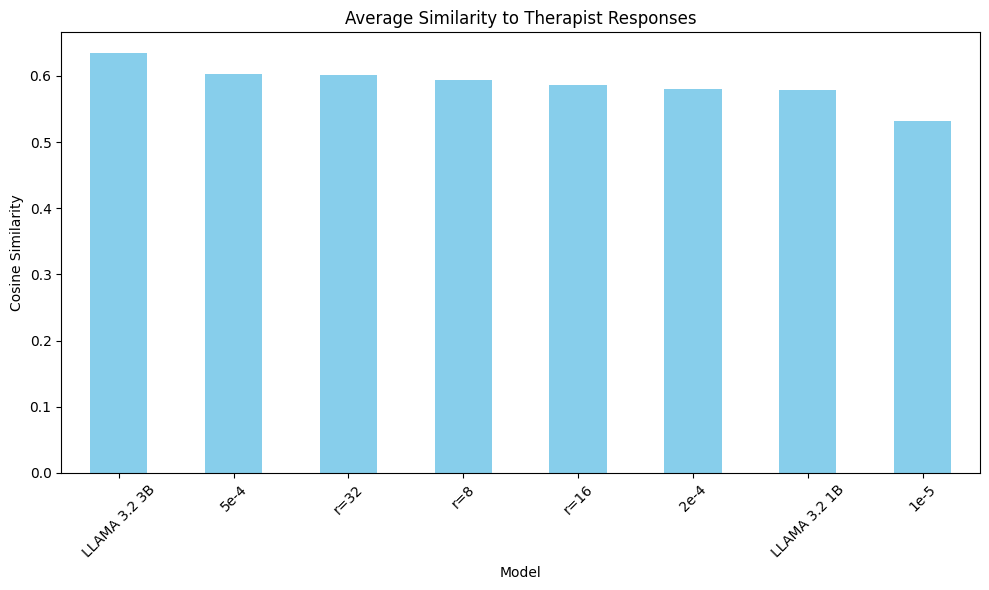

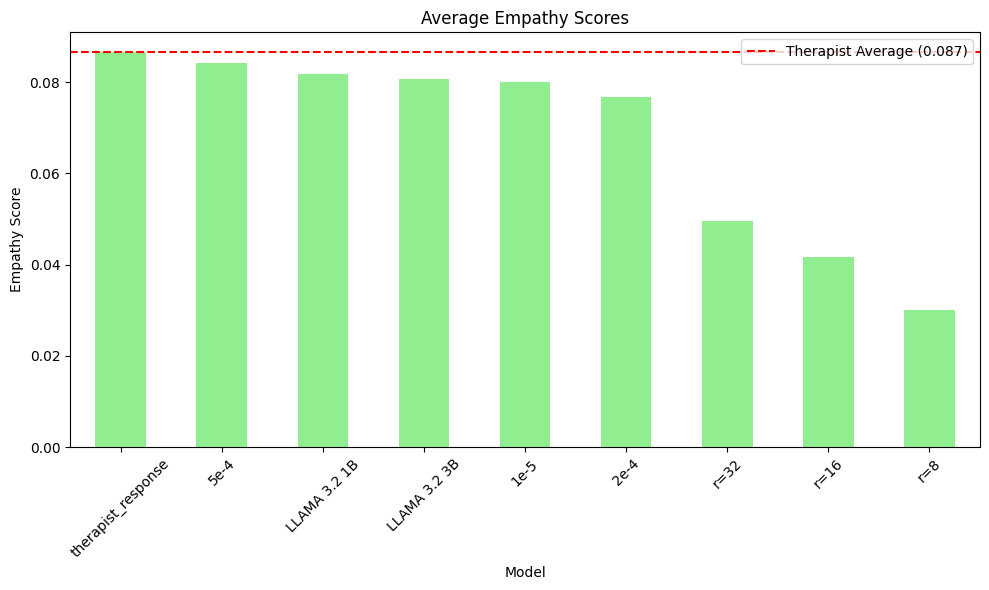

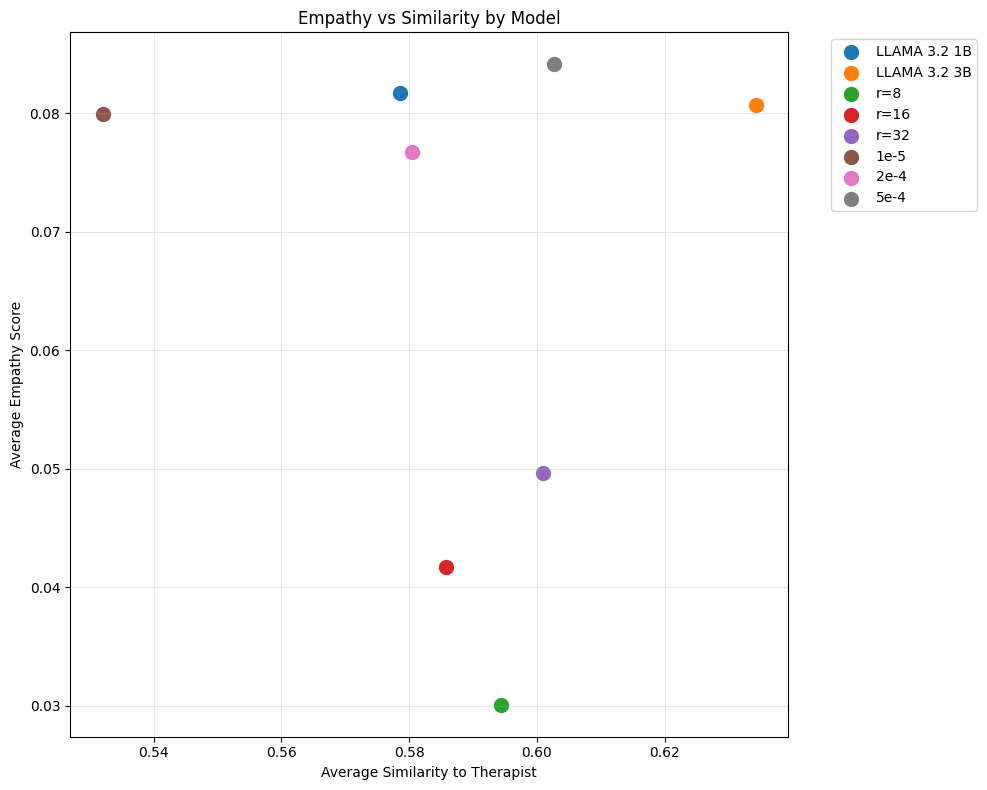

In [ ]:
# Step 5: Create visualizations
print("Creating visualizations...")

# 5.1: Average similarity bar chart
plt.figure(figsize=(10, 6))
avg_similarities = similarity_results.mean().sort_values(ascending=False)
avg_similarities.plot(kind='bar', color='skyblue')
plt.title('Average Similarity to Therapist Responses')
plt.ylabel('Cosine Similarity')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_similarities.png')

# 5.2: Average empathy scores bar chart
plt.figure(figsize=(10, 6))
avg_empathy = empathy_results.mean().sort_values(ascending=False)
avg_empathy.plot(kind='bar', color='lightgreen')
plt.axhline(y=empathy_results['therapist_response'].mean(), color='r', linestyle='--',
           label=f'Therapist Average ({empathy_results["therapist_response"].mean():.3f})')
plt.title('Average Empathy Scores')
plt.ylabel('Empathy Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('avg_empathy.png')

# 5.3: Empathy vs Similarity scatter plot
plt.figure(figsize=(10, 8))
for col in llm_columns:
    avg_sim = similarity_results[col].mean()
    avg_emp = empathy_results[col].mean()
    plt.scatter(avg_sim, avg_emp, s=100, label=col)

plt.title('Empathy vs Similarity by Model')
plt.xlabel('Average Similarity to Therapist')
plt.ylabel('Average Empathy Score')
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('empathy_vs_similarity.png')

# Save raw scores to CSV
similarity_results.to_csv('similarity_scores.csv')
empathy_results.to_csv('empathy_scores.csv')

print("\nResults saved to CSV files")
print("Visualizations saved as PNG files")

# NEW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import re

In [ ]:
# Step 1: Load the CSV data
print("Loading data...")
df = pd.read_csv("/content/Experiment Summary - Sheet2.csv")
print(f"Loaded {len(df)} conversations")


Loading data...
Loaded 101 conversations


In [ ]:
# Step 2: Clean text function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove strange characters and normalize whitespace
    text = re.sub(r'[^\w\s.,!?\'"-]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
# Step 3: Load models
print("Loading models...")
# Model for semantic similarity
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')

# Model for empathy detection
empathy_model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
empathy_tokenizer = AutoTokenizer.from_pretrained(empathy_model_name)
empathy_model = AutoModelForSequenceClassification.from_pretrained(empathy_model_name)

# Function to evaluate empathy
def evaluate_empathy(text):
    """Return empathy score based on emotional content"""
    if not text:
        return np.nan

    # Prepare inputs
    inputs = empathy_tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

    # Get prediction
    with torch.no_grad():
        outputs = empathy_model(**inputs)

    # Get scores (emotion probabilities)
    scores = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Emotions in this model: ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
    # For empathy, we focus on 'love' (index 3) which is closest to empathy/caring
    empathy_score = scores[0][3].item()

    return empathy_score

Loading models...


In [ ]:
# Step 4: Calculate empathy scores for all responses (including therapist)
print("Calculating empathy scores...")
# Get LLM column names (all columns after the therapist_response)
llm_columns = df.columns[2:].tolist()
all_columns = ['therapist_response'] + llm_columns

# Create dataframe to store empathy results
empathy_results = pd.DataFrame(index=df.index)

# Calculate empathy for all responses
for col in all_columns:
    print(f"Processing empathy for {col}...")
    empathy_scores = []
    for idx, row in df.iterrows():
        text = clean_text(row[col])
        empathy_score = evaluate_empathy(text)
        empathy_scores.append(empathy_score)
    empathy_results[col] = empathy_scores

# Step 5: Calculate similarity between therapist and LLM responses
print("Calculating similarities...")
similarity_results = pd.DataFrame(index=df.index)

for idx, row in df.iterrows():
    # Get therapist response
    therapist_text = clean_text(row['therapist_response'])
    if not therapist_text:
        continue

    # Get therapist embedding
    therapist_embedding = similarity_model.encode(therapist_text)

    # Calculate similarity for each LLM response
    for col in llm_columns:
        llm_text = clean_text(row[col])
        if not llm_text:
            similarity_results.loc[idx, col] = np.nan
            continue

        # Calculate similarity
        llm_embedding = similarity_model.encode(llm_text)
        similarity = cosine_similarity(
            therapist_embedding.reshape(1, -1),
            llm_embedding.reshape(1, -1)
        )[0][0]
        similarity_results.loc[idx, col] = similarity

Calculating empathy scores...
Processing empathy for therapist_response...
Processing empathy for LLAMA 3.2 1B...
Processing empathy for LLAMA 3.2 3B...
Processing empathy for r=8...
Processing empathy for r=16...
Processing empathy for r=32...
Processing empathy for 1e-5...
Processing empathy for 2e-4...
Processing empathy for 5e-4...
Calculating similarities...


In [ ]:
# Step 6: Calculate average scores
avg_empathy = empathy_results.mean().sort_values(ascending=False)
avg_similarity = similarity_results.mean().sort_values(ascending=False)

Creating visualizations...

=== SIMILARITY SCORES ===
LLAMA 3.2 3B: 0.6343
5e-4: 0.6027
r=32: 0.6010
r=8: 0.5944
r=16: 0.5858
2e-4: 0.5804
LLAMA 3.2 1B: 0.5785
1e-5: 0.5320

=== EMPATHY SCORES ===
therapist_response: 0.0866
5e-4: 0.0841
LLAMA 3.2 1B: 0.0817
LLAMA 3.2 3B: 0.0807
1e-5: 0.0800
2e-4: 0.0767
r=32: 0.0496
r=16: 0.0417
r=8: 0.0301

=== THERAPIST VS LLM EMPATHY COMPARISON ===
Real therapist average empathy score: 0.0866
5e-4: 0.0841 (-0.0024, -2.82% compared to therapist)
LLAMA 3.2 1B: 0.0817 (-0.0049, -5.63% compared to therapist)
LLAMA 3.2 3B: 0.0807 (-0.0059, -6.80% compared to therapist)
1e-5: 0.0800 (-0.0066, -7.62% compared to therapist)
2e-4: 0.0767 (-0.0099, -11.38% compared to therapist)
r=32: 0.0496 (-0.0370, -42.69% compared to therapist)
r=16: 0.0417 (-0.0449, -51.83% compared to therapist)
r=8: 0.0301 (-0.0565, -65.25% compared to therapist)

Detailed results saved to 'evaluation_results.txt'


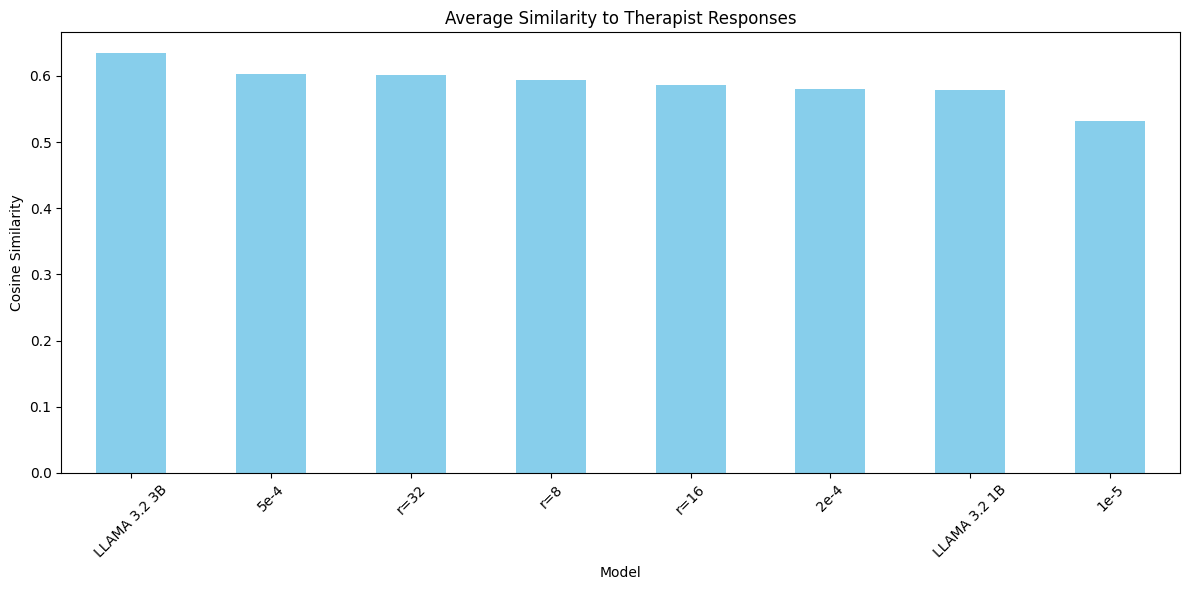

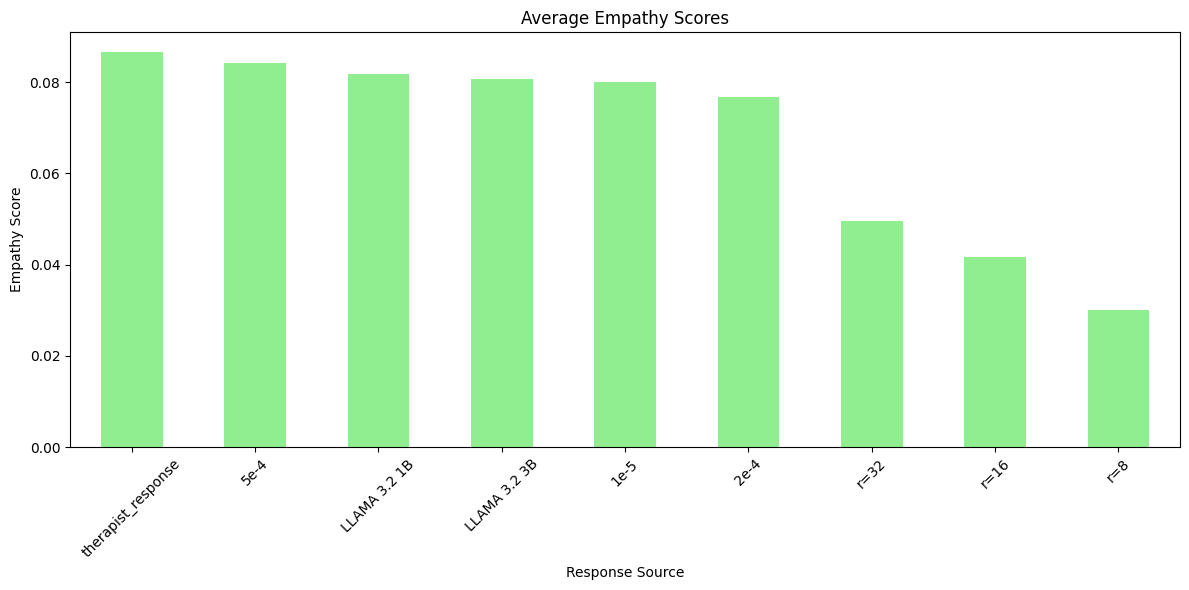

<Figure size 1200x600 with 0 Axes>

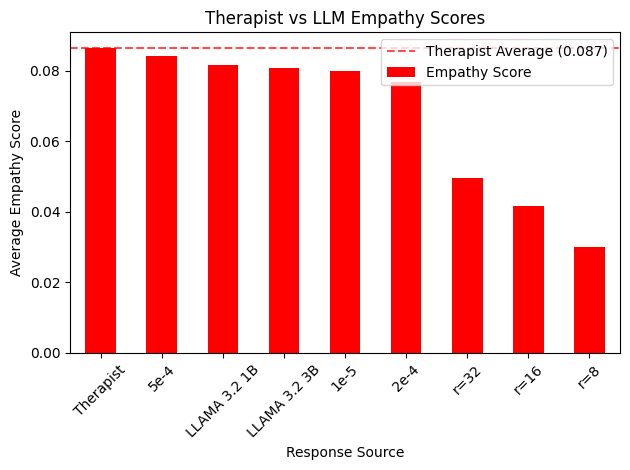

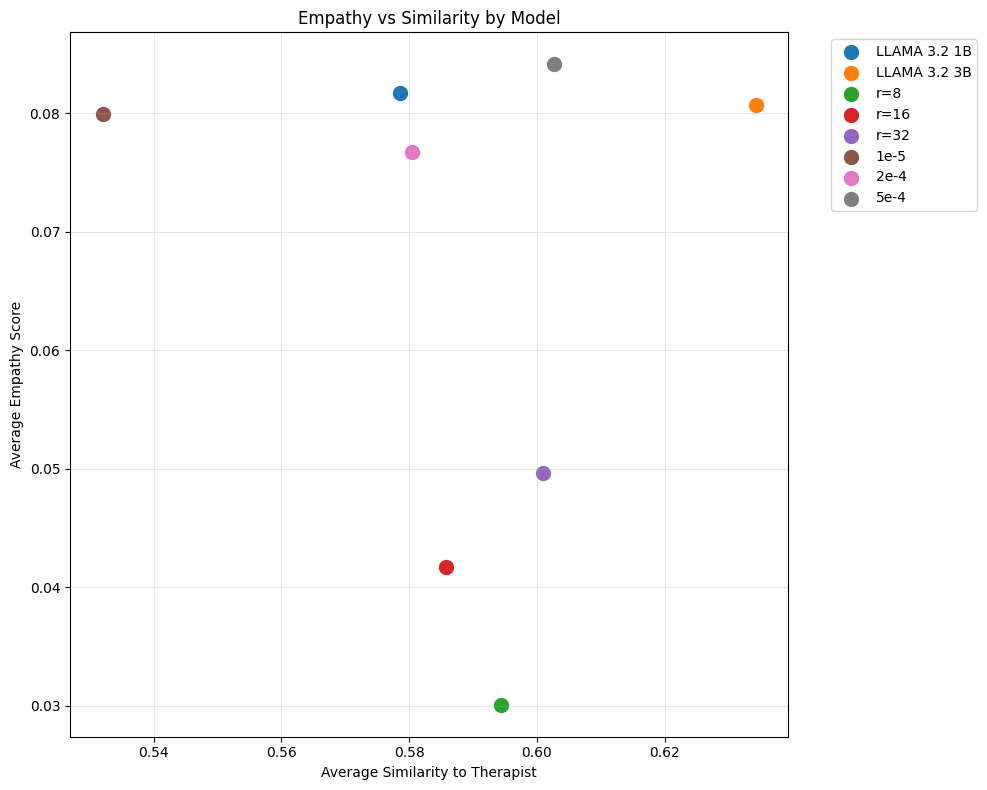

In [ ]:
# Step 7: Create visualizations
print("Creating visualizations...")

# 7.1: Average similarity bar chart
plt.figure(figsize=(12, 6))
avg_similarity.plot(kind='bar', color='skyblue')
plt.title('Average Similarity to Therapist Responses')
plt.ylabel('Cosine Similarity')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_similarities.png')

# 7.2: Average empathy scores bar chart
plt.figure(figsize=(12, 6))
avg_empathy.plot(kind='bar', color='lightgreen')
plt.title('Average Empathy Scores')
plt.ylabel('Empathy Score')
plt.xlabel('Response Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_empathy.png')

# 7.3: Empathy scores comparison (therapist vs LLMs)
plt.figure(figsize=(12, 6))
therapist_avg = empathy_results['therapist_response'].mean()
llm_empathy_avgs = empathy_results[llm_columns].mean().sort_values(ascending=False)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Empathy Score': [therapist_avg] + llm_empathy_avgs.tolist()
}, index=['Therapist'] + llm_empathy_avgs.index.tolist())

comparison_df.plot(kind='bar', color=['red'] + ['lightblue'] * len(llm_empathy_avgs))
plt.title('Therapist vs LLM Empathy Scores')
plt.ylabel('Average Empathy Score')
plt.xlabel('Response Source')
plt.axhline(y=therapist_avg, color='red', linestyle='--', alpha=0.7,
           label=f'Therapist Average ({therapist_avg:.3f})')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('therapist_vs_llm_empathy.png')

# 7.4: Empathy vs Similarity scatter plot
plt.figure(figsize=(10, 8))
for col in llm_columns:
    avg_sim = similarity_results[col].mean()
    avg_emp = empathy_results[col].mean()
    plt.scatter(avg_sim, avg_emp, s=100, label=col)

plt.title('Empathy vs Similarity by Model')
plt.xlabel('Average Similarity to Therapist')
plt.ylabel('Average Empathy Score')
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('empathy_vs_similarity.png')

# Save raw scores to CSV
similarity_results.to_csv('similarity_scores.csv')
empathy_results.to_csv('empathy_scores.csv')

# Step 8: Generate text output with average scores
print("\n=== SIMILARITY SCORES ===")
for model, score in avg_similarity.items():
    print(f"{model}: {score:.4f}")

print("\n=== EMPATHY SCORES ===")
for source, score in avg_empathy.items():
    print(f"{source}: {score:.4f}")

print("\n=== THERAPIST VS LLM EMPATHY COMPARISON ===")
print(f"Real therapist average empathy score: {therapist_avg:.4f}")
for model, score in llm_empathy_avgs.items():
    diff = score - therapist_avg
    diff_percent = (diff / therapist_avg) * 100
    print(f"{model}: {score:.4f} ({diff:+.4f}, {diff_percent:+.2f}% compared to therapist)")

# Create a text file with the results
with open('evaluation_results.txt', 'w') as f:
    f.write("=== EVALUATION RESULTS ===\n\n")

    f.write("=== SIMILARITY SCORES ===\n")
    for model, score in avg_similarity.items():
        f.write(f"{model}: {score:.4f}\n")

    f.write("\n=== EMPATHY SCORES ===\n")
    for source, score in avg_empathy.items():
        f.write(f"{source}: {score:.4f}\n")

    f.write("\n=== THERAPIST VS LLM EMPATHY COMPARISON ===\n")
    f.write(f"Real therapist average empathy score: {therapist_avg:.4f}\n")
    for model, score in llm_empathy_avgs.items():
        diff = score - therapist_avg
        diff_percent = (diff / therapist_avg) * 100
        f.write(f"{model}: {score:.4f} ({diff:+.4f}, {diff_percent:+.2f}% compared to therapist)\n")

print("\nDetailed results saved to 'evaluation_results.txt'")

# Model Benchmarking

Loading data...
Loaded 10 conversations
Loading models...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Calculating empathy scores...
Processing empathy for therapist_response...
Processing empathy for MirrorAI...
Processing empathy for Mistral 7B...
Processing empathy for Claude 3.5...
Processing empathy for Gemini 2.0...
Processing empathy for DeepSeek V3...
Processing empathy for Llama 3 8B...
Calculating similarities...
Creating visualizations...

=== SIMILARITY SCORES ===
DeepSeek V3: 0.6970
Gemini 2.0: 0.6461
Mistral 7B: 0.5882
Llama 3 8B: 0.5688
Claude 3.5: 0.5214
MirrorAI: 0.5158

=== EMPATHY SCORES ===
therapist_response: 0.1287
Llama 3 8B: 0.1138
MirrorAI: 0.1102
Gemini 2.0: 0.0930
Claude 3.5: 0.0149
DeepSeek V3: 0.0059
Mistral 7B: 0.0053

=== MODEL VS THERAPIST EMPATHY COMPARISON ===
Real therapist average empathy score: 0.1287
MirrorAI: 0.1102 (-0.0185, -14.39% compared to therapist)
Mistral 7B: 0.0053 (-0.1234, -95.88% compared to therapist)
Claude 3.5: 0.0149 (-0.1139, -88.46% compared to therapist)
Gemini 2.0: 0.0930 (-0.0358, -27.79% compared to therapist)
DeepSeek V3: 0.

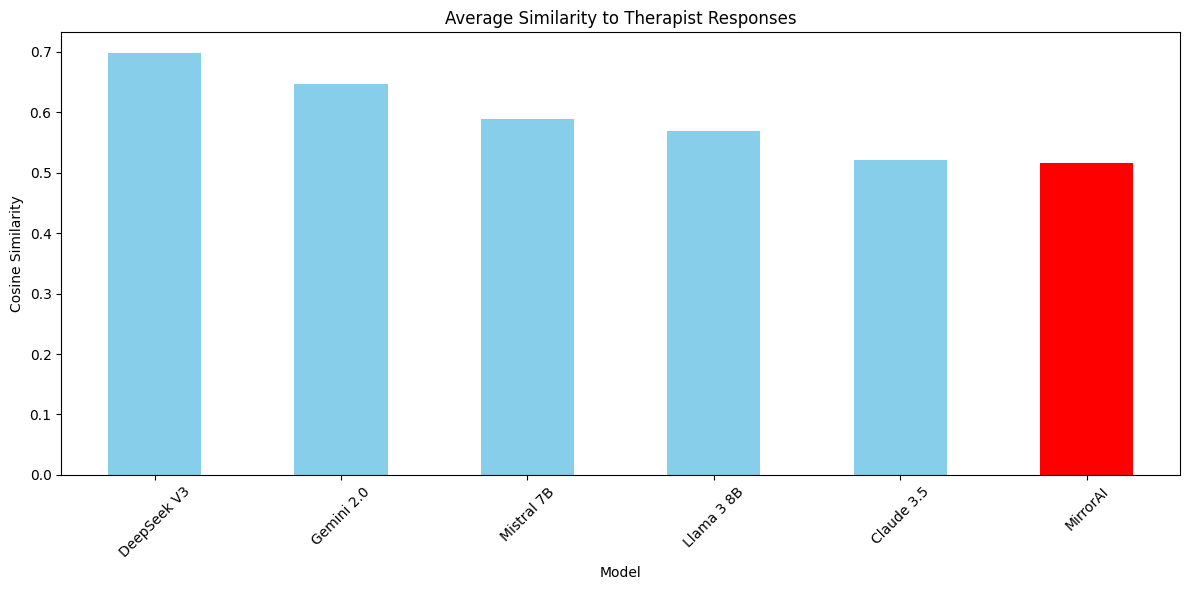

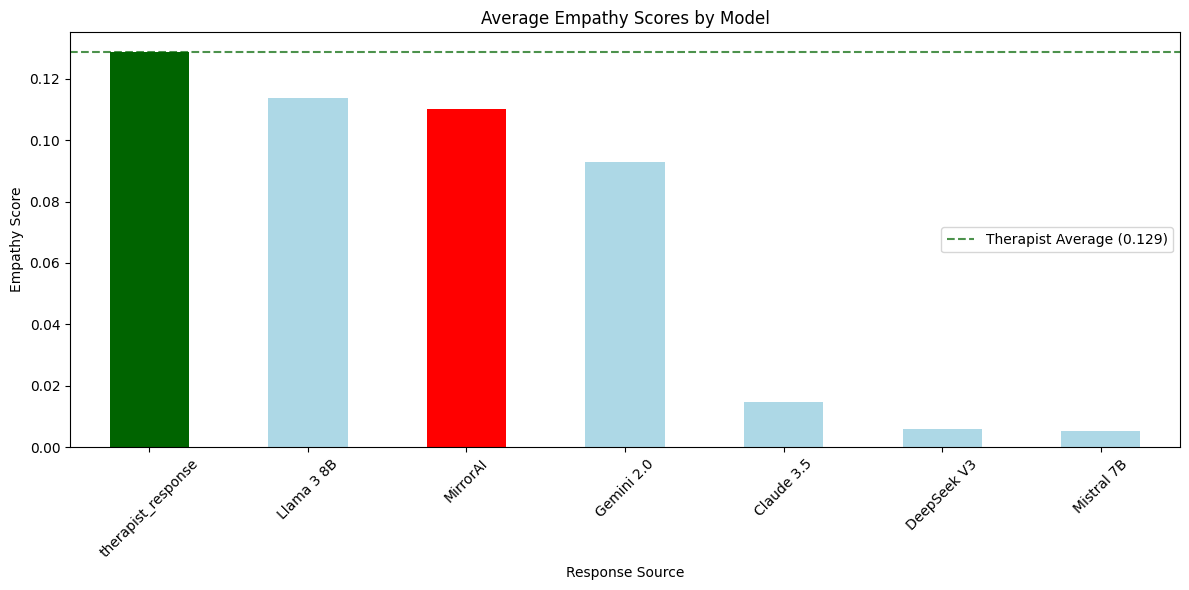

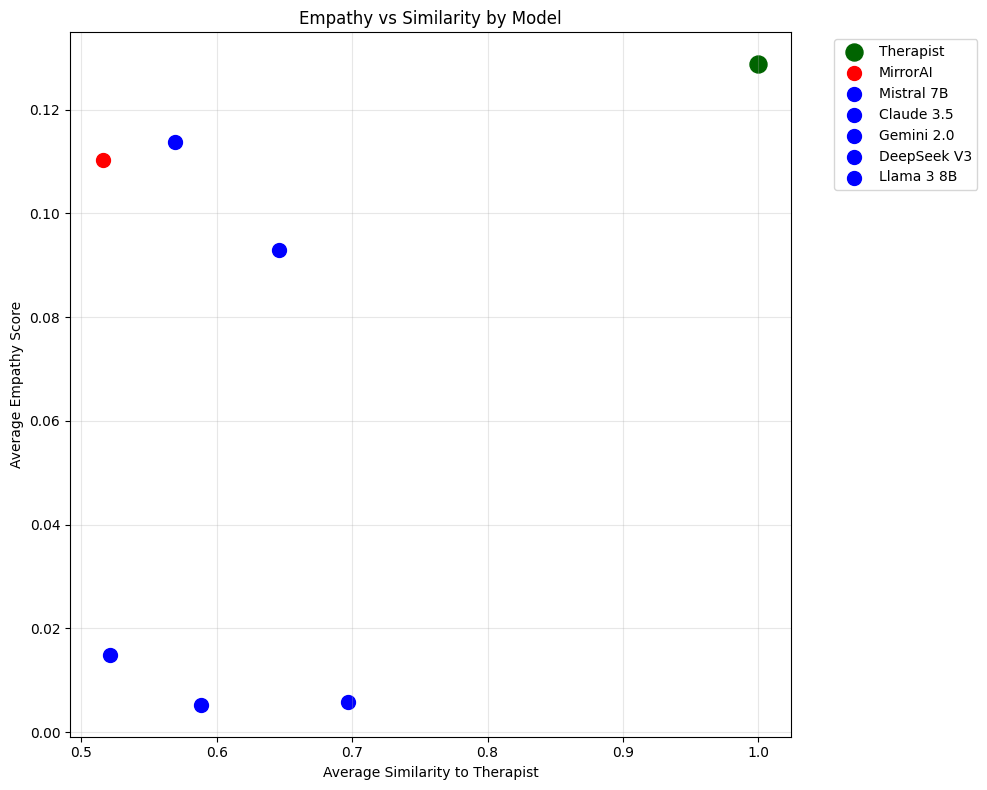

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import re

# Step 1: Load the CSV data
print("Loading data...")
df = pd.read_csv("/content/Model Benchmarking.csv")
print(f"Loaded {len(df)} conversations")

# Step 2: Clean text function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove strange characters and normalize whitespace
    text = re.sub(r'[^\w\s.,!?\'"-]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Step 3: Load models
print("Loading models...")
# Model for semantic similarity
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')

# Model for empathy detection
empathy_model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
empathy_tokenizer = AutoTokenizer.from_pretrained(empathy_model_name)
empathy_model = AutoModelForSequenceClassification.from_pretrained(empathy_model_name)

# Function to evaluate empathy
def evaluate_empathy(text):
    """Return empathy score based on emotional content"""
    if not text:
        return np.nan

    # Prepare inputs
    inputs = empathy_tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

    # Get prediction
    with torch.no_grad():
        outputs = empathy_model(**inputs)

    # Get scores (emotion probabilities)
    scores = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Emotions in this model: ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
    # For empathy, we focus on 'love' (index 3) which is closest to empathy/caring
    empathy_score = scores[0][3].item()

    return empathy_score

# Step 4: Calculate empathy scores for all responses (including therapist)
print("Calculating empathy scores...")
# Get model column names (all columns after the therapist_response)
model_columns = df.columns[2:].tolist()
all_columns = ['therapist_response'] + model_columns

# Create dataframe to store empathy results
empathy_results = pd.DataFrame(index=df.index)

# Calculate empathy for all responses
for col in all_columns:
    print(f"Processing empathy for {col}...")
    empathy_scores = []
    for idx, row in df.iterrows():
        text = clean_text(row[col])
        empathy_score = evaluate_empathy(text)
        empathy_scores.append(empathy_score)
    empathy_results[col] = empathy_scores

# Step 5: Calculate similarity between therapist and model responses
print("Calculating similarities...")
similarity_results = pd.DataFrame(index=df.index)

for idx, row in df.iterrows():
    # Get therapist response
    therapist_text = clean_text(row['therapist_response'])
    if not therapist_text:
        continue

    # Get therapist embedding
    therapist_embedding = similarity_model.encode(therapist_text)

    # Calculate similarity for each model response
    for col in model_columns:
        model_text = clean_text(row[col])
        if not model_text:
            similarity_results.loc[idx, col] = np.nan
            continue

        # Calculate similarity
        model_embedding = similarity_model.encode(model_text)
        similarity = cosine_similarity(
            therapist_embedding.reshape(1, -1),
            model_embedding.reshape(1, -1)
        )[0][0]
        similarity_results.loc[idx, col] = similarity

# Step 6: Calculate average scores
avg_empathy = empathy_results.mean().sort_values(ascending=False)
avg_similarity = similarity_results.mean().sort_values(ascending=False)

# Step 7: Create visualizations
print("Creating visualizations...")

# 7.1: Highlight MirrorAI in the similarity chart
plt.figure(figsize=(12, 6))
colors = ['red' if x == 'MirrorAI' else 'skyblue' for x in avg_similarity.index]
avg_similarity.plot(kind='bar', color=colors)
plt.title('Average Similarity to Therapist Responses')
plt.ylabel('Cosine Similarity')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_similarity.png')

# 7.2: Empathy scores comparison (therapist vs models)
plt.figure(figsize=(12, 6))
therapist_avg = empathy_results['therapist_response'].mean()

# Use different colors to highlight MirrorAI and therapist
colors = []
for x in avg_empathy.index:
    if x == 'therapist_response':
        colors.append('darkgreen')
    elif x == 'MirrorAI':
        colors.append('red')
    else:
        colors.append('lightblue')

avg_empathy.plot(kind='bar', color=colors)
plt.title('Average Empathy Scores by Model')
plt.ylabel('Empathy Score')
plt.xlabel('Response Source')
plt.axhline(y=therapist_avg, color='darkgreen', linestyle='--', alpha=0.7,
           label=f'Therapist Average ({therapist_avg:.3f})')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('model_empathy.png')

# 7.3: Empathy vs Similarity scatter plot
plt.figure(figsize=(10, 8))
# Add therapist point for reference (100% similarity with itself)
plt.scatter(1.0, empathy_results['therapist_response'].mean(),
           s=150, color='darkgreen', label='Therapist')

# Add model points
for col in model_columns:
    avg_sim = similarity_results[col].mean()
    avg_emp = empathy_results[col].mean()
    color = 'red' if col == 'MirrorAI' else 'blue'
    plt.scatter(avg_sim, avg_emp, s=100, color=color, label=col)

plt.title('Empathy vs Similarity by Model')
plt.xlabel('Average Similarity to Therapist')
plt.ylabel('Average Empathy Score')
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('empathy_vs_similarity.png')

# Save raw scores to CSV
similarity_results.to_csv('model_similarity_scores.csv')
empathy_results.to_csv('model_empathy_scores.csv')

# Step 8: Create comparison dataframe
comparison_df = pd.DataFrame({
    'Similarity': [similarity_results[col].mean() for col in model_columns],
    'Empathy': [empathy_results[col].mean() for col in model_columns],
})
comparison_df.index = model_columns

# Add therapist empathy score for reference
therapist_empathy = empathy_results['therapist_response'].mean()

# Step 9: Generate text output with average scores and rankings
print("\n=== SIMILARITY SCORES ===")
for model, score in avg_similarity.items():
    print(f"{model}: {score:.4f}")

print("\n=== EMPATHY SCORES ===")
for source, score in avg_empathy.items():
    print(f"{source}: {score:.4f}")

print("\n=== MODEL VS THERAPIST EMPATHY COMPARISON ===")
print(f"Real therapist average empathy score: {therapist_avg:.4f}")
for model in model_columns:
    diff = empathy_results[model].mean() - therapist_avg
    diff_percent = (diff / therapist_avg) * 100
    print(f"{model}: {empathy_results[model].mean():.4f} ({diff:+.4f}, {diff_percent:+.2f}% compared to therapist)")

# Create a text file with the results
with open('model_evaluation_results.txt', 'w') as f:
    f.write("=== MODEL EVALUATION RESULTS ===\n\n")

    f.write("=== SIMILARITY SCORES (higher is better) ===\n")
    for model, score in avg_similarity.items():
        f.write(f"{model}: {score:.4f}\n")

    f.write("\n=== EMPATHY SCORES ===\n")
    for source, score in avg_empathy.items():
        f.write(f"{source}: {score:.4f}\n")

    f.write("\n=== MODEL VS THERAPIST EMPATHY COMPARISON ===\n")
    f.write(f"Real therapist average empathy score: {therapist_avg:.4f}\n")
    for model in model_columns:
        diff = empathy_results[model].mean() - therapist_avg
        diff_percent = (diff / therapist_avg) * 100
        f.write(f"{model}: {empathy_results[model].mean():.4f} ({diff:+.4f}, {diff_percent:+.2f}% compared to therapist)\n")

    # Add overall ranking based on combined metrics
    f.write("\n=== OVERALL MODEL RANKING ===\n")
    # Normalize similarity and empathy scores (0-1 scale)
    normalized_similarity = (comparison_df['Similarity'] - comparison_df['Similarity'].min()) / (comparison_df['Similarity'].max() - comparison_df['Similarity'].min())
    normalized_empathy = (comparison_df['Empathy'] - comparison_df['Empathy'].min()) / (comparison_df['Empathy'].max() - comparison_df['Empathy'].min())

    # Calculate combined score (equal weighting)
    comparison_df['Combined Score'] = (normalized_similarity + normalized_empathy) / 2

    # Sort by combined score
    ranked_models = comparison_df.sort_values('Combined Score', ascending=False)

    for rank, (model, row) in enumerate(ranked_models.iterrows(), 1):
        f.write(f"{rank}. {model} - Similarity: {row['Similarity']:.4f}, Empathy: {row['Empathy']:.4f}, Combined: {row['Combined Score']:.4f}\n")

    # MirrorAI specific analysis
    f.write("\n=== MIRRORAI SPECIFIC ANALYSIS ===\n")
    mirror_rank = ranked_models.index.get_loc('MirrorAI') + 1
    mirror_similarity = similarity_results['MirrorAI'].mean()
    mirror_empathy = empathy_results['MirrorAI'].mean()

    f.write(f"MirrorAI Rank: {mirror_rank} out of {len(model_columns)} models\n")
    f.write(f"Similarity to therapist: {mirror_similarity:.4f}\n")
    f.write(f"Empathy score: {mirror_empathy:.4f}\n")

    # Compare to average of other models
    other_models = [m for m in model_columns if m != 'MirrorAI']
    avg_others_similarity = similarity_results[other_models].mean().mean()
    avg_others_empathy = empathy_results[other_models].mean().mean()

    sim_diff = (mirror_similarity - avg_others_similarity) / avg_others_similarity * 100
    emp_diff = (mirror_empathy - avg_others_empathy) / avg_others_empathy * 100

    f.write(f"Similarity comparison: {sim_diff:+.2f}% versus average of other models\n")
    f.write(f"Empathy comparison: {emp_diff:+.2f}% versus average of other models\n")

print("\nDetailed results saved to 'model_evaluation_results.txt'")